### Decision Tree

Basic Example of Decision Tree implementation

### About the data

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

DATA Source: IBM

### 1. Importing Libraries

In [1]:
# Data handling
import pandas as pd

# for model creation and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# for tree vizualisation
from sklearn import tree
import matplotlib.pyplot as plt

# supress warnings
import warnings
warnings.simplefilter('ignore')

### 2. Data Load & Overview

In [2]:
# loading the dataset
df = pd.read_csv('Data/drugdata.csv')

In [3]:
# check the size of the dataset
df.shape

(200, 6)

This dataset contains 200 rows and 6 columns

In [4]:
# looking at the first 10 rows of the data
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


This dataset contains medical records of patients

* Age: age in years
* Sex: (F=Female; M=Male)
* BP: Blood Pressure (High,Normal,Low)
* Cholesterol: (High,Normal,Low)
* Na_to_K: Sodium - Potassium Ratio
* Drug: type of Drug that help this patient

The main goal will be to ***build a model that predicts what drug will help the patient*** based on the independent variables

In [5]:
# check the datatypes of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Observations:
* Age and Na_to_K are already in the correct datatype
* We will convert all others to categorical types
* There are no null values in the dataset

In [6]:
# converting Objet types to category types
df.Sex = df.Sex.astype('category')
df.BP = df.BP.astype('category')
df.Cholesterol = df.Cholesterol.astype('category')
df.Drug = df.Drug.astype('category')

In [7]:
df.dtypes

Age               int64
Sex            category
BP             category
Cholesterol    category
Na_to_K         float64
Drug           category
dtype: object

### 3. Data Processing

* Split dependent and independent variables
* Encode categorical colums

In [8]:
# Independent variables
X = df.drop('Drug',axis=1)

# Dependent Variable (Target)
y = df['Drug']

In [9]:
# defining a list of independent categorical variables
cat_var = ['Sex','BP','Cholesterol']

In [10]:
# Encoding categorical variables
for category in cat_var:
    X[category] = X[category].cat.codes

In [11]:
# looking at new encoded data
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


### 4. Model

* Build Model
* Evaluate Model
* Make predictions
* visualize model

This will be the steps to create the model

### 4.1 Build model

* Split variables into training and testing sets
* Initialize the model
* Train the model

In [78]:
# spliting the data 7:3
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [79]:
# Defining model
model = DecisionTreeClassifier(max_depth=4,
                               random_state=12)

# training model
model.fit(X_train,y_train);

### 4.2 Evaluate Model

* Checking Accuracy of model in both training and testing data

In [80]:
# looking at model performance
print(f'Training Accuracy {model.score(X_train,y_train):.2f}')
print(f'Testing Accuracy {model.score(X_test,y_test):.2f}')

Training Accuracy 1.00
Testing Accuracy 0.97


### 4.3 Making a prediction

* patient with:
  - Age: 25 
  - Sex: M (1)
  - BP: High (0)
  - Cholesterol: High (0)
  - Na_to_K: 11.52

In [84]:
# making a prediction
pred = model.predict([[25,1,0,0,11.52]])
pred[0]

'drugA'

In [85]:
# getting the problability of each class
prob = model.predict_proba([[25,1,0,0,11.52]])

# creating a dictionary with the probrabily of each class
results = dict(map(lambda i,j : (i,j) , list(model.classes_),prob[0]))
results

{'drugA': 1.0, 'drugB': 0.0, 'drugC': 0.0, 'drugX': 0.0, 'drugY': 0.0}

#### Prediction Results given the patient's values:
* drugA is the drug that would work on this patient
* Model calculated the highest probability that this drug would work on this patient among the available drugs

### 4.4 Visualizing model

In [86]:
# looking at the logic of the model
text_representation = tree.export_text(model)
print(text_representation)


|--- feature_4 <= 14.84
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 53.00
|   |   |   |--- class: drugA
|   |   |--- feature_0 >  53.00
|   |   |   |--- class: drugB
|   |--- feature_2 >  0.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: drugC
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: drugX
|   |   |--- feature_2 >  1.50
|   |   |   |--- class: drugX
|--- feature_4 >  14.84
|   |--- class: drugY



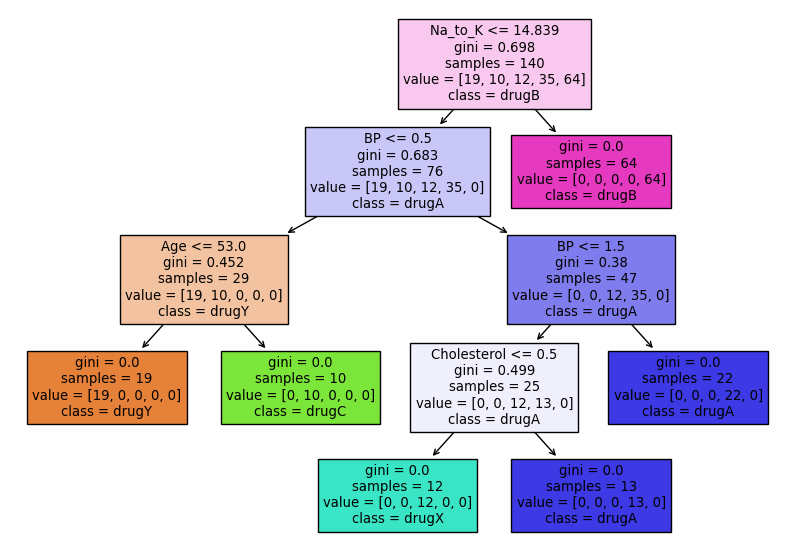

In [87]:
# Vizualising Tree
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(model,
                   max_depth=6,
                   feature_names=X.columns.tolist(),  
                   class_names=y.unique().tolist(),
                   filled=True)

### 5. Hyper parameter tunning (max_depth)

In [88]:
# Hyper parameter tunning on max_depth
for depth in [1, 2, 3, 4,5]:
    
    #initialize a model
    model = DecisionTreeClassifier(max_depth = depth,
                                 random_state = 123)
    
    #fit the model
    model.fit(X_train, y_train)
    
    #print results
    print(f'max_depth = {depth}')
    print(f'Accuracy on training set: {model.score(X_train, y_train):.2f}')
    print(f'Accuracy on test set: {model.score(X_test, y_test):.2f}\n')

max_depth = 1
Accuracy on training set: 0.71
Accuracy on test set: 0.77

max_depth = 2
Accuracy on training set: 0.84
Accuracy on test set: 0.83

max_depth = 3
Accuracy on training set: 0.91
Accuracy on test set: 0.90

max_depth = 4
Accuracy on training set: 1.00
Accuracy on test set: 0.97

max_depth = 5
Accuracy on training set: 1.00
Accuracy on test set: 0.97



This is a way of increasing accuracy of a model, it is clear how the accuracy changes as the parameter value changes 

### 5.1 All hyper parameters

all the following parameters can be hyper tunned in a Decision Tree Classifier

In [90]:
# Decision tree classifier with all default parameters
clf = DecisionTreeClassifier(criterion='gini', 
                             splitter='best', 
                             max_depth=None,
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features=None, 
                             random_state=None, 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             class_weight=None, 
                             ccp_alpha=0.0)